# EDA on Penguins

In this notebook exercise, we will conduct simple EDA steps on the popular penguins dataset.

### Load the dataset

Dataset source: https://github.com/allisonhorst/palmerpenguins

In [279]:
import seaborn as sns

In [280]:
df = sns.load_dataset('penguins')

In [281]:
df.shape

(344, 7)

# Step 1 Understand the Features

You can find information about this dataset here: https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris

**Question: in your own words**:
1. describe each feature
2. mention its type (numeric or categorical)
3. write its name in Arabic

Note: use a Markdown cell.

The dataset consists of 7 columns:
species نوع البطريق: penguin species (Chinstrap, Adélie, or Gentoo)
culmen_length_mm   الطول:المنقار العلوي culmen length (mm)
culmen_depth_mm عمق المنقار العلوي: culmen depth (mm)
flipper_length_mmطول الزعنفة: flipper length (mm)
body_mass_gكتلة الجسم : body mass (g)
islandاسم الجزيرة : island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica)
sex الجنس: penguin sex

Hint: you can attach an image to illustrate what the features are.

<img src="https://github.com/allisonhorst/palmerpenguins/raw/main/man/figures/culmen_depth.png" width="400">

# Step 2

- Have a look at the columns and their values (`head`, `sample`, `tail`)
- Look at the technical information (`info`)

In [282]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [283]:
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,Male


In [284]:
df.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,Female
298,Gentoo,Biscoe,45.2,13.8,215.0,4750.0,Female
198,Chinstrap,Dream,50.1,17.9,190.0,3400.0,Female
201,Chinstrap,Dream,49.8,17.3,198.0,3675.0,Female
38,Adelie,Dream,37.6,19.3,181.0,3300.0,Female


# Step 3

1. For each column, check and handle missing values; state your strategy and justify it. Examples:
    - Strategy: drop the column. Justification: ...?
    - Strategy: fill missing values. Justificaiton: ...?
    - Strategy: drop the row. Justification: ...?
1. Calculate count and percentage of missing values before handling them
1. Check and handle duplicated rows
1. Calculate the percentage of data loss after cleaning

In [285]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

bill_length_mm,bill_depth_mm ,flipper_length_mm,body_mass_g  we fill the nul values with the mean
for sex we drop the null values

In [286]:
num_rows = len(df)

In [287]:
missing_count = df.isnull().sum().sum()
missing_count

19

In [288]:
missing_values_before=(df.isnull().mean().mean())*100
missing_values_before

0.7890365448504983

In [289]:
df['bill_length_mm'].fillna(df['bill_length_mm'].mean(), inplace=True)
df['bill_depth_mm'].fillna(df['bill_depth_mm'].mean(), inplace=True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean(), inplace=True)
df['body_mass_g'].fillna(df['body_mass_g'].mean(), inplace=True)

In [290]:
df.dropna(subset=['sex'], inplace=True)

In [294]:
df.shape

(333, 7)

In [291]:
(num_rows - len(df)) * 100

1100

In [293]:
missing_values_after=(df.isnull().mean().mean())*100
missing_values_after

0.0

In [186]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Step 4

#### Data types conversion
- We shall convert the string types to `category` to preserve memory
- numeric types can be stored in less precision: `float32`

In [187]:
mem_usage_before = df.memory_usage(deep=True)

In [188]:
# convert categotical types
df['species'] = df['species'].astype('category')
# ...?
# ...?

In [189]:
# convert numerical types
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
# ...?
# ...?
# ...?

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    object  
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float32 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    object  
dtypes: category(1), float32(1), float64(3), object(2)
memory usage: 17.4+ KB


In [191]:
df['species'] = df['species'].astype('category')
df['island'] = df['island'].astype('category')
df['sex'] = df['sex'].astype('category')

In [192]:
df['bill_depth_mm'] = df['bill_depth_mm'].astype('float32')
df['flipper_length_mm'] = df['flipper_length_mm'].astype('float32')
df['body_mass_g'] = df['body_mass_g'].astype('float32')
df['bill_length_mm'] = df['bill_length_mm'].astype('float32')

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    category
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float32 
 3   bill_depth_mm      333 non-null    float32 
 4   flipper_length_mm  333 non-null    float32 
 5   body_mass_g        333 non-null    float32 
 6   sex                333 non-null    category
dtypes: category(3), float32(4)
memory usage: 9.2 KB


Calculate memory saved after type conversion

In [194]:
# mem_usage_after = ...?
mem_usage_after = df.memory_usage(deep=True)

In [295]:
print('memory saved:', (mem_usage_before - mem_usage_after).sum() // 1024, 'KB')

memory saved: 64 KB


# Step 5

*italicized text*#### Detect inconsistency in categorical values

The categorical columns should be checked for any inconsistencies. For example. We look for lowercase, uppercase, or inconsistent use of codes (e.g., "M", "F") with non-codes (e.g., "Male", "Female")  in the `sex` column.

- hint: use `.unique()` to check the number of unique values in a column
- you can also use: `.value_counts()` to check the frequency of each value in a column

In [196]:
df['sex'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [197]:
df.value_counts()

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.500000       18.100000      187.0              2900.0       Female    1
Gentoo   Biscoe     44.000000       13.600000      208.0              4350.0       Female    1
                    43.599998       13.900000      217.0              4900.0       Female    1
                    43.500000       15.200000      213.0              4650.0       Female    1
                                    14.200000      220.0              4700.0       Female    1
                                                                                            ..
Adelie   Torgersen  36.599998       17.799999      185.0              3700.0       Female    1
                    36.200001       17.200001      187.0              3150.0       Female    1
                                    16.100000      187.0              3550.0       Female    1
                    35.900002       16.600000      190.

# Step 6: Univariate Analysis

- Separate numerical from categorical columns (hint; use `df.select_dtypes()`)
- Look at the statistical information for each:
    - `df_num.describe().T`
    - `df_cat.describe().T`

In [198]:
dfc=df.select_dtypes(include='category')
dfn=df.select_dtypes(include='float32')

In [199]:
dfn.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,333.0,43.992794,5.468668,32.099998,39.5,44.500000,48.599998,59.599998
bill_depth_mm,333.0,17.164865,1.969235,13.100000,15.6,17.299999,18.700001,21.500000
flipper_length_mm,333.0,200.966965,14.015765,172.000000,190.0,197.000000,213.000000,231.000000
body_mass_g,333.0,4207.057129,805.215820,2700.000000,3550.0,4050.000000,4775.000000,6300.000000


In [200]:
dfc.describe().T

,count,unique,top,freq
species,333,3,Adelie,146
island,333,3,Biscoe,163
sex,333,2,Male,168


Use charts to plot `value_counts()` categorical variables:
1. plot `species` using bar plot
1. plot `island` using pie chart
1. plot `sex` using horizontal bar plot

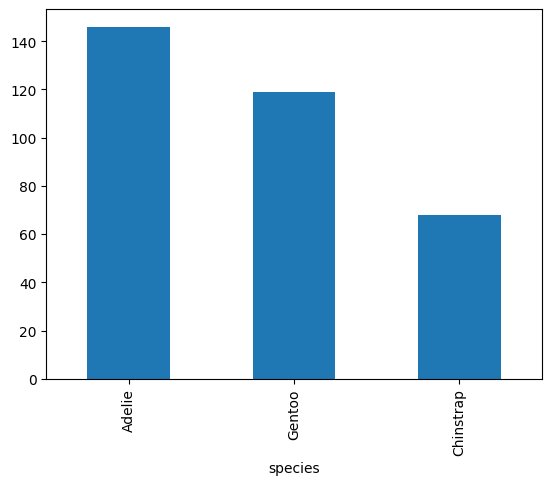

In [201]:
import matplotlib.pyplot as plt
df['species'].value_counts().plot(kind='bar')
plt.show()

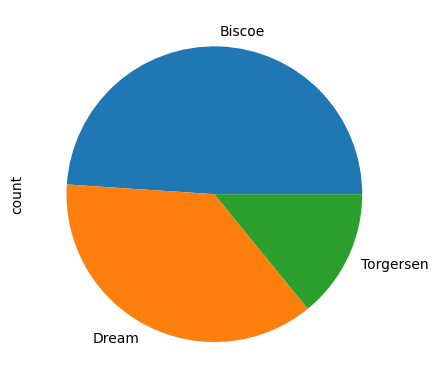

In [202]:
import matplotlib.pyplot as plt
df['island'].value_counts().plot(kind='pie')
plt.show()

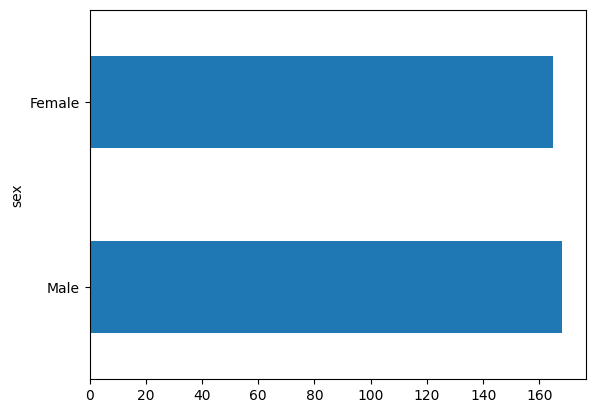

In [203]:
import matplotlib.pyplot as plt
df['sex'].value_counts().plot(kind='barh')
plt.show()

Plot numerical variables:

1. Boxplot: `bill_length_mm`
1. Histogram: `bill_depth_mm`
1. Boxplot: `flipper_length_mm`
1. Histogram: `body_mass_g`

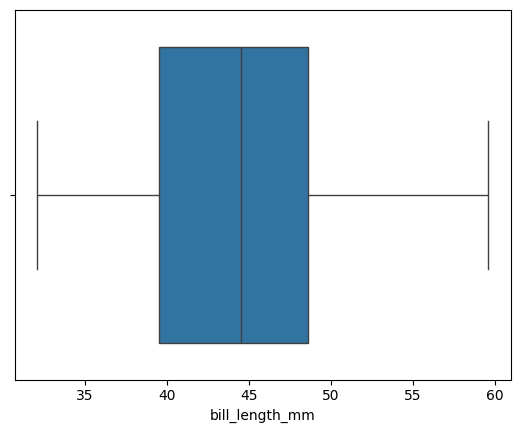

In [204]:
import seaborn as sns
sns.boxplot(x=df['bill_length_mm'])
plt.show()

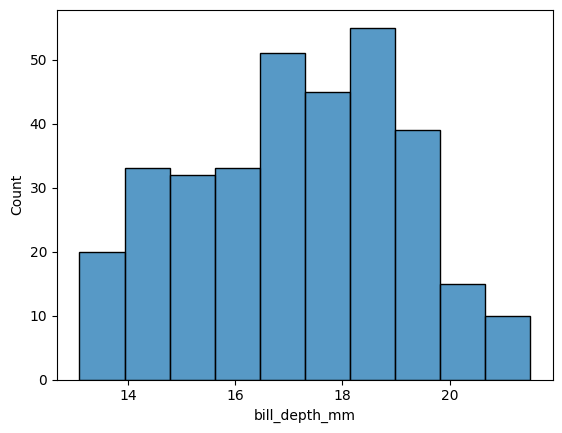

In [205]:
import seaborn as sns
sns.histplot(df['bill_depth_mm'])
plt.show()

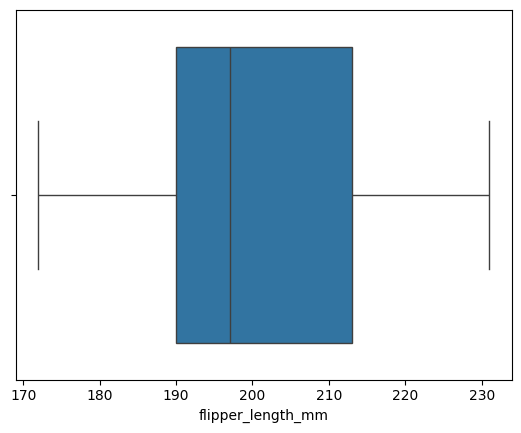

In [206]:
import seaborn as sns
sns.boxplot(x=df['flipper_length_mm'])
plt.show()

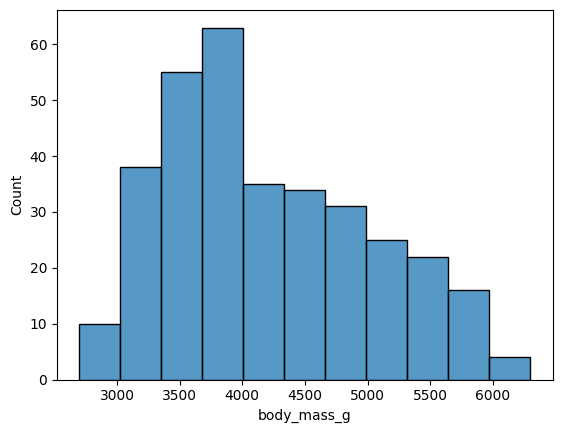

In [207]:
import seaborn as sns
sns.histplot(df['body_mass_g'])
plt.show()

## Step 7: Bivariate Analysis

#### Correlation between numerical features

Let's find out if there is any correlation between numerical features.

- Hint: you can use the `df.corr()` to find the correlation matrix.
- Hint: you can use `sns.heatmap()` to plot the correlation matrix

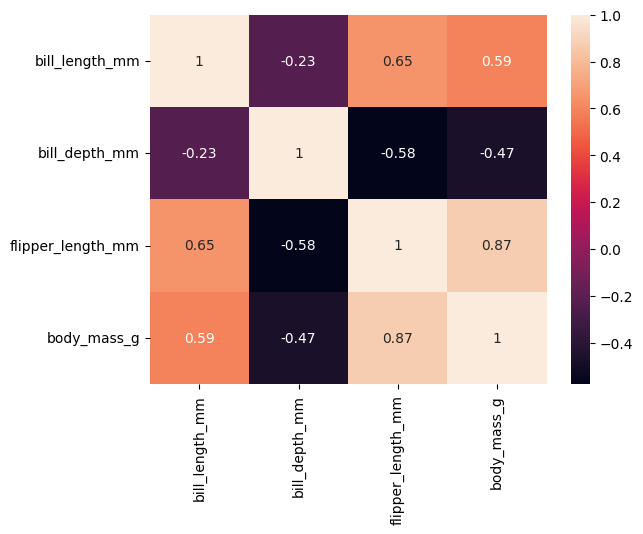

In [208]:
dfn.corr()
sns.heatmap(dfn.corr(), annot=True)
plt.show()

Write down your observations based on the correlation heatmap.

Observations:

### Feature Engineering

- We might try adding the feature `bill_size` which is the product of `bill_length` and `bill_depth` to see if it has any significance in the model.
- We might also try `bill_ratio` which is the ratio of `bill_length` to `bill_depth` to see if it has any significance in the model.

In [210]:
dfn['bill_size'] = dfn['bill_length_mm'] * dfn['bill_depth_mm']
dfn['bill_ratio'] = dfn['bill_length_mm'] / dfn['bill_depth_mm']


In [211]:
dfn.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,bill_size,bill_ratio
0,39.099998,18.700001,181.0,3750.0,731.169983,2.090909
1,39.500000,17.400000,186.0,3800.0,687.299988,2.270115
2,40.299999,18.000000,195.0,3250.0,725.399963,2.238889
4,36.700001,19.299999,193.0,3450.0,708.309998,1.901554
5,39.299999,20.600000,190.0,3650.0,809.580017,1.907767


Let's look at the correlation to see whether the newly created features are better.

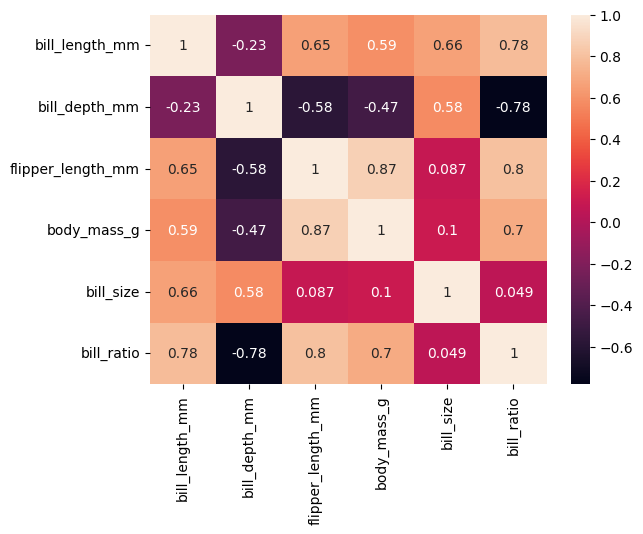

<Axes: >

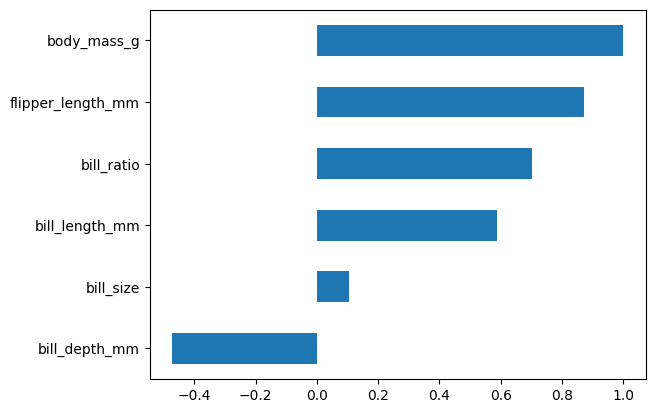

In [215]:
# This plots the correlation values for a specific column
# which is usually what we are interested in
r=dfn.corr()
sns.heatmap(dfn.corr(), annot=True)
plt.show()
r['body_mass_g'].sort_values().plot.barh()